In [2]:
if 'autoreload' not in globals():
    %load_ext autoreload
    %autoreload 2
    autoreload = True
import pickle
import numpy as np
from openpifpaf import datasets, encoder, logs, network, optimize, visualizer, decoder
import argparse, shlex
import torch

def get_args(cmd):
    parser = argparse.ArgumentParser(
        prog='python3 -m openpifpaf.train',
        description=__doc__,
        formatter_class=argparse.ArgumentDefaultsHelpFormatter,
    )

    logs.cli(parser)
    network.cli(parser)
    decoder.cli(parser, force_complete_pose=False, instance_threshold=0.1, seed_threshold=0.5)
    network.losses.cli(parser)
    encoder.cli(parser)
    optimize.cli(parser)
    datasets.train_cli(parser)
    visualizer.cli(parser)

    parser.add_argument('-o', '--output', default=None,
                        help='output file')
    parser.add_argument('--stride-apply', default=1, type=int,
                        help='apply and reset gradients every n batches')
    parser.add_argument('--epochs', default=75, type=int,
                        help='number of epochs to train')
    parser.add_argument('--rescale-images', type=float, default=1.0,
                        help='overall image rescale factor')
    parser.add_argument('--update-batchnorm-runningstatistics',
                        default=False, action='store_true',
                        help='update batch norm running statistics')
    parser.add_argument('--ema', default=1e-2, type=float,
                        help='ema decay constant')
    parser.add_argument('--disable-cuda', action='store_true',
                        help='disable CUDA')

    group = parser.add_argument_group('debug')
    group.add_argument('--profile', default=None,
                       help='enables profiling. specify path for chrome tracing file')
    group.add_argument('--log-stats', default=False, action='store_true',
                       help='enable stats logging')
    group.add_argument('--debug-images', default=False, action='store_true',
                       help='print debug messages and enable all debug images')

    args = parser.parse_args(shlex.split(cmd))

    network.configure(args)
    network.losses.configure(args)
    encoder.configure(args)
    datasets.train_configure(args)
    visualizer.configure(args)
    if args.debug_images:
        args.debug = True

    # add args.device
    args.device = torch.device('cpu')
    args.pin_memory = False

    return args

args = get_args("--dataset keemotion  --basenet resnet50  --headnets cifcentball pan")

net_cpu, start_epoch = network.factory_from_args(args)
net_cpu.process_heads = None
if args.log_stats:
    logging.getLogger('openpifpaf.stats').setLevel(logging.DEBUG)

loss = network.losses.factory_from_args(args, net_cpu.head_nets)
target_transforms = encoder.factory(net_cpu.head_nets, net_cpu.base_net.stride)
train_loader, val_loader = datasets.train_factory(args, target_transforms)
decode = decoder.factory_from_args(args, net_cpu)

heads.py!!!!!!! 19
multihead loss: %s, %s ['cifcentball.c', 'cifcentball.vec1', 'cifcentball.scales1', 'pan.semantic', 'pan.offset'] [1.0, 1.0, 1.0, 1.0, 1.0]


In [46]:
data, target, meta = next(iter(val_loader))

In [4]:
print('Number of heads: ', len(target))
print('Number of fields in PIF: ', len(target[0]))
print('Number of fields in PAN: ', len(target[1]))
print('Batch size: ', len(target[0][0]))

Number of heads:  2
Number of fields in PIF:  3
Number of fields in PAN:  4
Batch size:  8


In [4]:
data_in_batch = 1

In [32]:
confidence = target[0][0][data_in_batch][0].numpy()
from openpifpaf.datasets.constants import COCO_KEYPOINTS

for k in range(len(COCO_KEYPOINTS)):
    confidence = target[0][0][data_in_batch][k].numpy()
    ones = 0
    zeros = 0
    nans = 0
    others = 0
    for i in range(len(confidence)):
        for j in range(len(confidence[0])):
            if confidence[i,j] == 1:
                ones += 1
            elif confidence[i,j] == 0:
                zeros += 1
            elif np.isnan(confidence[i,j]):
                nans += 1
            else:
    #             print(confidence[i,j])
#                 nans += 1
                pass

    print('      keypoint: ', COCO_KEYPOINTS[k])
    print('ones: ', ones)
    print('zeros: ', zeros)
    print('nans: ', nans)
    print('-----------------------')
# print('others: ', others)
            

      keypoint:  nose
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_eye
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_eye
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_ear
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_ear
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_shoulder
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_shoulder
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_elbow
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_elbow
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_wrist
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  right_wrist
ones:  0
zeros:  2401
nans:  0
-----------------------
      keypoint:  left_hip
ones:  0
zeros:  2401
nans:  0
-----------------------
      key

In [3]:
# print(target[0][0][data_in_batch][0].shape)
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,20))
# plt.imshow(target[0][0][data_in_batch][0])
from openpifpaf.datasets.constants import COCO_KEYPOINTS
#####################
# visualize PIF Confidence
#####################


import matplotlib.pyplot as plt
axes = []
fig = plt.figure(figsize=(20,120))
for i in range(17,18):
    axes.append(fig.add_subplot(9, 2, i+1))
    subplot_title = ('Keypoint: '+ COCO_KEYPOINTS[i])
    axes[-1].set_title(subplot_title)
    con = target[0][0][data_in_batch][i].numpy()
#     aa = np.ones
    plt.imshow(con+10, cmap='jet')
    
plt.show()

NameError: name 'data_in_batch' is not defined

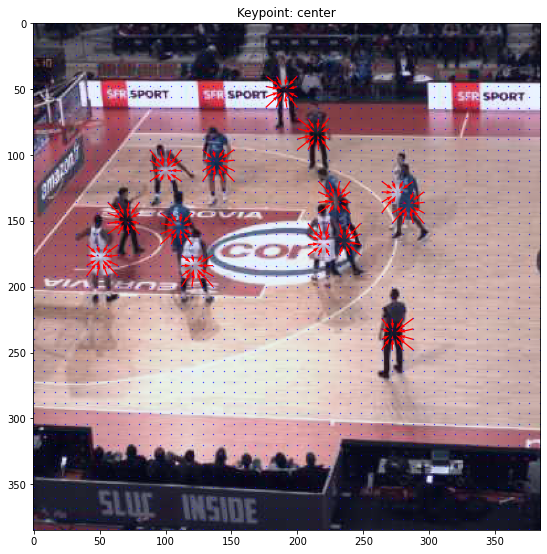

In [47]:
from openpifpaf.datasets.constants import COCO_KEYPOINTS
#####################
# visualize PIF Vectors
#####################


import matplotlib.pyplot as plt
# print(data.shape)
# fig, ax = plt.subplots(9,2)
image = np.transpose(data[data_in_batch].numpy(),(1,2,0))
image = (image - image.min())/(image.max() - image.min())
# plt.imshow(image)
axes = []
fig = plt.figure(figsize=(20,120))
for i in range(17,18):
    axes.append(fig.add_subplot(9, 2, i+1))
    subplot_title = ('Keypoint: '+ COCO_KEYPOINTS[i])
    axes[-1].set_title(subplot_title)
    
    y = target[0][1][data_in_batch][i][0]
    x = target[0][1][data_in_batch][i][1]
    
    origin = np.indices(x.shape)
    origin_copy = origin.copy()
    origin_copy[0] = origin[1]*8
    origin_copy[1] = origin[0]*8
    plt.quiver(*origin_copy, y, -x,scale=70, color='r')
    plt.scatter(x=origin[0]*8, y=origin[1]*8, c='b', s=.1)
    
    confidence = target[0][0][data_in_batch][i]
#     plt.scatter(x=confidence[0]*8, y=confidence[1]*8, c='b', s=.1)
    
    plt.imshow(image)
    
plt.show()




In [48]:
from openpifpaf.network.heads import CifPanCollector
cifcollector = CifPanCollector([0])
def apply(f, items):
    """Apply f in a nested fashion to all items that are not list or tuple."""
    if items is None:
        return None
    if isinstance(items, (list, tuple)):
        return [apply(f, i) for i in items]
    if isinstance(items, dict):
        return {k: apply(f, v) for k, v in items.items()}
    return f(items)


pred = net_cpu(data)
cif, pan = pred
print('Pred before collection')
print([c.shape for c in cif])
cif, pan = cifcollector(pred)
cif = apply(lambda x: x.detach().cpu().numpy(), cif)
pan = apply(lambda x: x.detach().cpu().numpy(), pan)
print('Pred after collection')
print(cif.shape)
print({k: v.shape for k, v in pan.items()})
decode((cif[0], {k: v[0] for k, v in pan.items()}))

Pred before collection
[torch.Size([8, 19, 1, 49, 49]), torch.Size([8, 19, 1, 2, 49, 49]), torch.Size([8, 19, 1, 49, 49]), torch.Size([8, 19, 1, 49, 49])]
Pred after collection
(8, 19, 5, 49, 49)
{'semantic': (8, 3, 385, 385), 'offset': (8, 2, 385, 385)}


In [51]:

# cifcollector = CifPanCollector([0])
cif, pan = target
print('Target before collection')
cif = [cif[0][:,:,None,:,:],
       cif[1][:,:,None,:2,:,:],
       cif[1][:,:,None,3,:,:],
       cif[2][:,:,None,:,:]]
print([c.shape for c in cif])
cif, pan = cifcollector((cif, pan))
print('Target after collection')
print(cif.shape)

cif = apply(lambda x: x.detach().cpu().numpy(), cif)
pan = apply(lambda x: x.detach().cpu().numpy(), pan)
print(pan['semantic'].shape)
if len(pan['semantic'].shape) == 3:
       pan['semantic'] = pan['semantic'][:,None,:,:] == np.arange(pan['semantic'].max())[None,:,None,None]
decode((cif[0], {k: v[0] for k, v in pan.items()}))
# cif, pan = target

Target before collection
[torch.Size([8, 19, 1, 49, 49]), torch.Size([8, 19, 1, 2, 49, 49]), torch.Size([8, 19, 1, 49, 49]), torch.Size([8, 19, 1, 49, 49])]
Target after collection
torch.Size([8, 19, 5, 49, 49])
(8, 385, 385)


In [35]:
print(target[1]['semantic'].shape)
print(target[1]['offset'].shape)

torch.Size([8, 385, 385])
torch.Size([8, 2, 385, 385])


torch.int64
tensor(0)


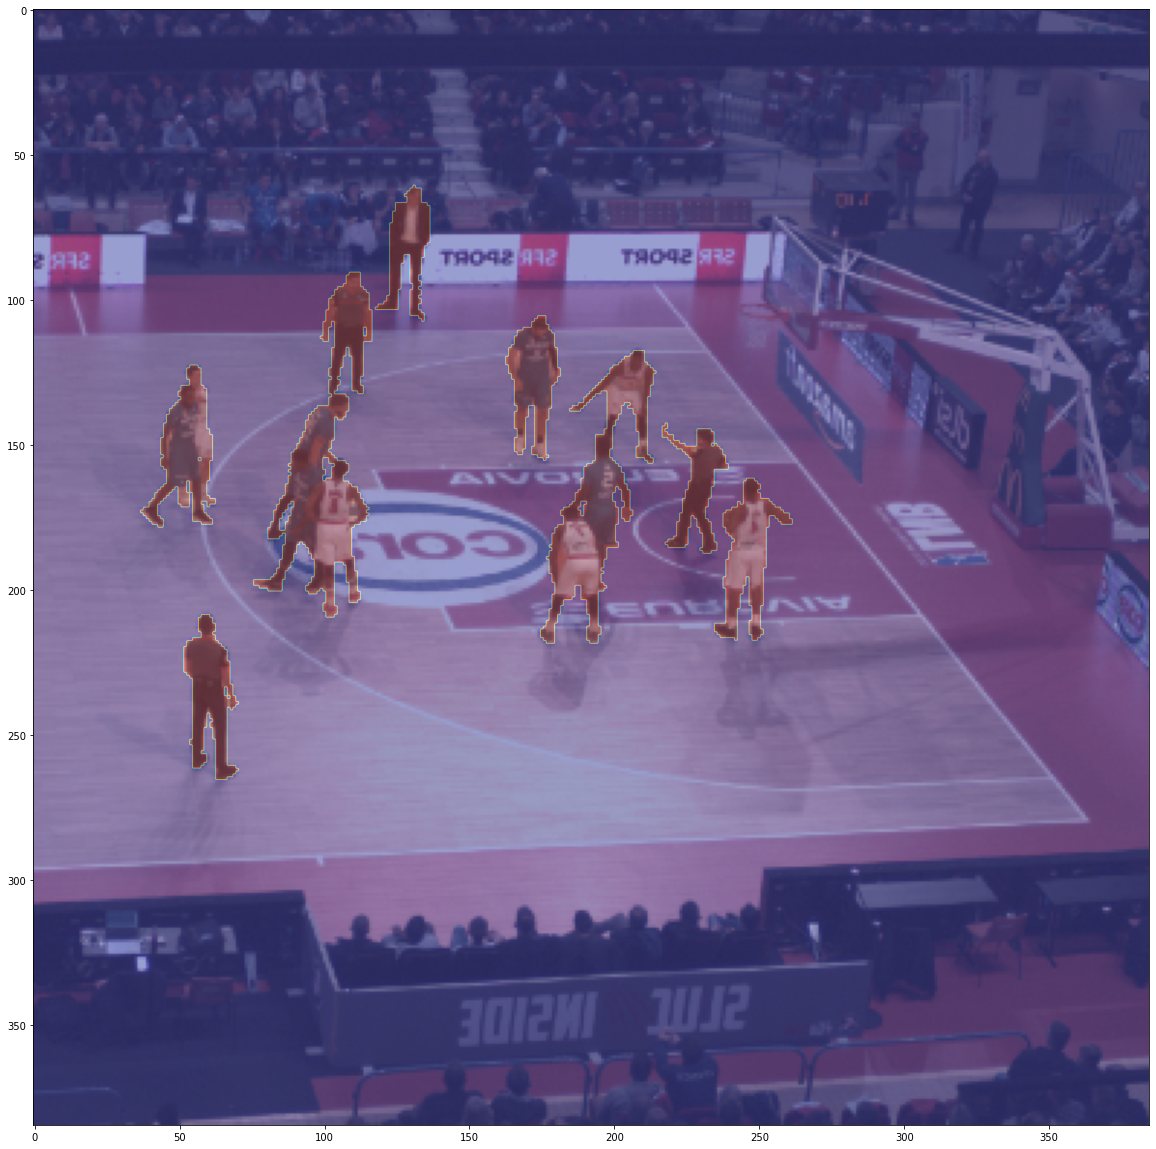

In [7]:

#####################
# visualize PAN 
#####################


import matplotlib.pyplot as plt
import copy
# print(data.shape)
# fig, ax = plt.subplots(9,2)
image = np.transpose(data[data_in_batch].numpy(),(1,2,0))
image = (image - image.min())/(image.max() - image.min())
# plt.imshow(image)
axes = []
fig = plt.figure(figsize=(20,120))
# nnn = copy.deepcopy(target[1]['semantic'][data_in_batch])
# mmm = np.ones((385,385))
# mmm = mmm*nnn.numpy()
# mmm[0:385:4, 0:385:4] = np.nan

for i in range(1):
    axes.append(fig.add_subplot(1, 1, i+1))
#     subplot_title = ('Keypoint: '+ str(i+1))
#     axes[-1].set_title(subplot_title)
    
    y = target[1]['offset'][data_in_batch][0]
    x = target[1]['offset'][data_in_batch][1]
    
    origin = np.indices(x.shape)
    origin_copy = origin.copy()
    origin_copy[0] = origin[1]
    origin_copy[1] = origin[0]
    # plt.quiver(*origin_copy, x, -y, scale=500, color='r', alpha=1)
    # plt.scatter(x=origin[0], y=origin[1], c='b', s=.8)
    
    # confidence = target[0][0][data_in_batch][i]
    # plt.scatter(x=confidence[0]*8, y=confidence[1]*8, c='b', s=.1)
    semantic = target[1]['semantic'][data_in_batch]
    print(semantic.dtype)
    plt.imshow(semantic, alpha=.7, cmap='jet')
    print(np.isnan(semantic).sum())
    
    plt.imshow(image, alpha=.5)
    
plt.show()




In [15]:
try:
    data, target, meta = next(iter(scenes))
except:
    

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])